In [2]:
import os
import shutil
from pathlib import Path
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image

%matplotlib inline

## Preprocess metadata file

In [3]:
# Two metadata file
# Metadata file in this format :
# dish_id, total_calories, total_mass, total_fat, total_carb, total_protein, num_ingrs, (ingr_1_id, ingr_1_name, ingr_1_grams, ingr_1_calories, ingr_1_fat, ingr_1_carb, ingr_1_protein, ...)

dish_metadata1 = Path("./metadata/dish_metadata_cafe1.csv")
dish_metadata2 = Path("./metadata/dish_metadata_cafe2.csv")
ingredients_metadata = pd.read_csv("./metadata/ingredients_metadata.csv")

In [4]:
ingredients_metadata

ingr   id  cal/g  fat(g)  carb(g)  protein(g)
0    cottage cheese    1  0.980   0.043    0.034       0.110
1      strawberries    2  0.330   0.003    0.080       0.007
2      garden salad    3  0.646   0.034    0.032       0.061
3             bacon    4  5.410   0.420    0.014       0.370
4          potatoes    5  0.770   0.001    0.170       0.020
..              ...  ...    ...     ...      ...         ...
550     pizza sauce  551  0.290   0.002    0.070       0.013
551     pomegranate  552  0.830   0.012    0.190       0.017
552      nut cheese  553  2.100   0.101    0.040       0.256
553     soy sausage  554  2.020   0.144    0.063       0.160
554             oil  555  8.864   1.000    0.000       0.000

[555 rows x 6 columns]

In [5]:
# dish_metadata1 convert into structured csv file with (dish_id, calories / g, fat/g, carbs/g, protein/g, ingredients as string)
rows = []
with open(dish_metadata1) as file:
    for line in file.readlines():
        row = []
        content = line.split(",")
        row.append(content[0])
        total_calorie = float(content[1])
        total_mass = float(content[2])
        total_fat = float(content[3])
        total_carb = float(content[4])
        total_protein = float(content[5])
        row.extend(
            [
                total_calorie / total_mass,
                total_carb / total_mass,
                total_protein / total_mass,
                total_fat / total_mass,
            ]
        )
        ingredients_content = content[6:]
        ingredients_list = []
        for i in range(1, len(ingredients_content), 7):
            if ingredients_content[i] == "":
                ingredient_no = int(ingredients_content[i - 1].split("_")[1])
                ingredient_name = ingredients_metadata.at[ingredient_no - 1, "ingr"]
                ingredients_list.append(ingredient_name)
            else:
                ingredients_list.append(ingredients_content[i])
        row.append(",".join(ingredients_list))
        rows.append(row)
cleaned_dish_metadata1 = pd.DataFrame(
    rows,
    columns=[
        "dish_id",
        "Calories(kcal)",
        "Carbohydrate(g)",
        "Protein(g)",
        "Fat(g)",
        "Ingredients",
    ],
)

In [6]:
cleaned_dish_metadata1.head()

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
0  dish_1561662216        1.558520         0.146209    0.096549  0.064184   
1  dish_1562688426        1.563295         0.058977    0.117011  0.093818   
2  dish_1561662054        1.436434         0.090245    0.088735  0.081638   
3  dish_1562008979        1.320471         0.035081    0.121881  0.076637   
4  dish_1560455030        0.199903         0.044903    0.009282  0.001437   

                                         Ingredients  
0  soy sauce,garlic,white rice,parsley,onions,bro...  
1             roasted potatoes,chicken apple sausage  
2  pepper,white rice,mixed greens,garlic,soy sauc...  
3  jalapenos,lemon juice,pork,wheat berry,cabbage...  
4             cherry tomatoes,cucumbers,baby carrots

**Note : An ingredient named "deprecated" is present after several checked it might be heavily linked to foods**

In [7]:
# dish_metadata2 convert into structured csv file with (dish_id, calories / g, fat/g, carbs/g, protein/g, ingredients as string)
# dish_metadata2 did not provide dish level nutrition info, manual add up is required

rows = []
with open(dish_metadata2) as file:
    for line in file.readlines():
        row = []
        content = line.split(",")
        row.append(content[0])
        total_mass = float(content[2])
        ingredients_content = content[6:]
        ingredients_list = []
        total_calorie_from_ingr = 0
        total_carbs_from_ingr = 0
        total_protein_from_ingr = 0
        total_fat_from_ingr = 0
        for i in range(0, len(ingredients_content), 7):
            if ingredients_content[i + 1] == "":
                ingredient_no = int(ingredients_content[i].split("_")[1])
                ingredient_name = ingredients_metadata.at[ingredient_no - 1, "ingr"]
                ingredients_list.append(ingredient_name)
            else:
                ingredients_list.append(ingredients_content[i + 1])
            total_calorie_from_ingr += float(ingredients_content[i + 3])
            total_fat_from_ingr += float(ingredients_content[i + 4])
            total_carbs_from_ingr += float(ingredients_content[i + 5])
            total_protein_from_ingr += float(ingredients_content[i + 6])
        total_calorie = total_calorie_from_ingr
        total_carb = total_carbs_from_ingr
        total_protein = total_protein_from_ingr
        total_fat = total_fat_from_ingr
        row.extend(
            [
                total_calorie / total_mass,
                total_carb / total_mass,
                total_protein / total_mass,
                total_fat / total_mass,
            ]
        )

        row.append(",".join(ingredients_list))
        rows.append(row)
cleaned_dish_metadata2 = pd.DataFrame(
    rows,
    columns=[
        "dish_id",
        "Calories(kcal)",
        "Carbohydrate(g)",
        "Protein(g)",
        "Fat(g)",
        "Ingredients",
    ],
)

In [8]:
cleaned_dish_metadata2.head()

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
0  dish_1572974428        1.954041         0.161582    0.043231  0.138704   
1  dish_1572464692        1.660000         0.140000    0.079000  0.096000   
2  dish_1571931594        1.410000         0.180000    0.021000  0.068000   
3  dish_1575478635        1.480000         0.016000    0.100000  0.110000   
4  dish_1572887017        0.917682         0.064411    0.076443  0.036212   

                                         Ingredients  
0  tomatoes,avocado,multigrain bread,olive oil,ed...  
1                                             hummus  
2                                   roasted potatoes  
3                                     scrambled eggs  
4                       hash browns,egg whites,salsa

In [9]:
len(cleaned_dish_metadata1)

4768

In [10]:
# Concat both dataset together
cleaned_metadata = pd.concat([cleaned_dish_metadata1, cleaned_dish_metadata2])

In [11]:
cleaned_metadata = cleaned_metadata.reset_index(drop=True)

In [12]:
cleaned_metadata

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
0     dish_1561662216        1.558520         0.146209    0.096549  0.064184   
1     dish_1562688426        1.563295         0.058977    0.117011  0.093818   
2     dish_1561662054        1.436434         0.090245    0.088735  0.081638   
3     dish_1562008979        1.320471         0.035081    0.121881  0.076637   
4     dish_1560455030        0.199903         0.044903    0.009282  0.001437   
...               ...             ...              ...         ...       ...   
5001  dish_1571934465        0.330000         0.080000    0.007000  0.003000   
5002  dish_1573073666        0.549019         0.077154    0.024811  0.022488   
5003  dish_1575924356        1.316000         0.248000    0.051000  0.011000   
5004  dish_1574359199        1.506565         0.118590    0.059204  0.086729   
5005  dish_1576171157        1.002627         0.065226    0.076498  0.053859   

                                            Ingredients  
0     soy sauce,garlic,white rice,parsley,onions,bro...  
1                roasted potatoes,chicken apple sausage  
2     pepper,white rice,mixed greens,garlic,soy sauc...  
3     jalapenos,lemon juice,pork,wheat berry,cabbage...  
4                cherry tomatoes,cucumbers,baby carrots  
...                                                 ...  
5001                                       strawberries  
5002     broccoli,olive oil,bread crumbs,salt,jalapenos  
5003                                              pasta  
5004             scrambled eggs,roasted potatoes,crepes  
5005  brussels sprouts,almonds,olive oil,chili,salt,...  

[5006 rows x 6 columns]

### Remove rows without image data

In [13]:
source_dir = Path("./imagery/side_angles")
source_dir2 = Path("./imagery/realsense_overhead")
all_dir = [x.name for x in source_dir.iterdir()]
all_dir2 = [x.stem for x in source_dir2.iterdir()]

In [14]:
all_dir = set(all_dir)
all_dir.update(all_dir2)

In [15]:
# remove rows without image data
all_dish_id = cleaned_metadata["dish_id"]
for dish in all_dish_id:
    if dish not in all_dir:
        index_to_drop = cleaned_metadata[cleaned_metadata["dish_id"] == dish].index
        cleaned_metadata = cleaned_metadata.drop(index_to_drop)

In [16]:
assert len(all_dir) == len(
    cleaned_metadata
), "The total entries of metadata does not matched with the total dish_id in image directory"

### Check for ingredients validity

In [17]:
# Check for ingredients
df_ingredients = pd.read_csv("./metadata/ingredients_metadata.csv")

In [18]:
pprint(sorted(df_ingredients["ingr"].tolist()))

['agave nectar',
 'alcohol',
 'alfalfa',
 'almond butter',
 'almond milk',
 'almonds',
 'american cheese',
 'anchovies',
 'apple',
 'apple cider',
 'apple juice',
 'apple pie',
 'applesauce',
 'apricots',
 'artic char',
 'artichokes',
 'arugula',
 'asparagus',
 'avocado',
 'baby carrots',
 'bacon',
 'bagels',
 'baked beans',
 'baked potatoes',
 'balsamic vinegar',
 'banana',
 'banana with peel',
 'barbecue sauce',
 'barley',
 'basil',
 'bean sprouts',
 'bean(seed) ',
 'beef',
 'beer',
 'beets',
 'bell peppers',
 'berries',
 'biscuits',
 'bison',
 'black beans',
 'blackberries',
 'blue cheese',
 'blueberries',
 'blueberry pie',
 'bok choy',
 'bologna',
 'brazil nuts',
 'bread',
 'bread crumbs',
 'breadsticks',
 'brie cheese',
 'brisket',
 'broccoli',
 'broth',
 'brown rice',
 'brown sugar',
 'brownies',
 'brussels sprouts',
 'bulgur',
 'buns',
 'burgers',
 'burritos',
 'butter',
 'buttermilk',
 'cabbage',
 'caesar dressing',
 'caesar salad',
 'cakes',
 'calamari',
 'calzones',
 'camembe

In [19]:
rows_with_invalid_ingredients = cleaned_metadata[
    cleaned_metadata["Ingredients"].str.contains("deprecated")
]
display(rows_with_invalid_ingredients)

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
5     dish_1558372433        0.520000         0.003000    0.140000  0.002000   
86    dish_1558114086        0.520000         0.003000    0.140000  0.002000   
190   dish_1558027001        0.300000         0.076000    0.006000  0.001000   
489   dish_1558373159        3.033943         0.091332    0.181512  0.236880   
858   dish_1558115364        1.550351         0.084677    0.126070  0.086291   
1021  dish_1558114875        0.520000         0.003000    0.140000  0.002000   
1087  dish_1558375506        0.520000         0.003000    0.140000  0.002000   
1335  dish_1558028142        0.300000         0.076000    0.006000  0.001000   
1504  dish_1558031019        1.047929         0.154437    0.037122  0.033269   
1574  dish_1558030724        0.300000         0.076000    0.006000  0.001000   
1656  dish_1558109945        0.520000         0.003000    0.140000  0.002000   
1679  dish_1558027243        1.615736         0.151521    0.076982  0.078515   
1931  dish_1558373074        0.520000         0.003000    0.140000  0.002000   
2077  dish_1558379876        3.070190         0.085952    0.182599  0.240019   
2181  dish_1558115282        0.520000         0.003000    0.140000  0.002000   
2199  dish_1558379588        0.520000         0.003000    0.140000  0.002000   
2450  dish_1558376984        1.919080         0.086371    0.129829  0.130240   
2618  dish_1558028606        0.300000         0.076000    0.006000  0.001000   
2654  dish_1558122740        0.855757         0.074424    0.094141  0.025339   
2711  dish_1558116547        0.520000         0.003000    0.140000  0.002000   
2741  dish_1558115047        0.960849         0.035689    0.120651  0.048972   
2755  dish_1558380152        0.520000         0.003000    0.140000  0.002000   
3086  dish_1558375583        1.538382         0.020813    0.149390  0.098251   
3282  dish_1558031394        0.746572         0.174453    0.013302  0.001638   
3398  dish_1558114284        0.513386         0.071421    0.067472  0.002000   
3599  dish_1558028772        0.333333         0.082083    0.006292  0.001318   
3605  dish_1558031351        0.300000         0.076000    0.006000  0.001000   
3644  dish_1558376768        0.520000         0.003000    0.140000  0.002000   
3645  dish_1558372771        1.680418         0.085881    0.123177  0.106048   
3774  dish_1558380181        1.197879         0.104540    0.092722  0.058703   
4507  dish_1558028194        1.325872         0.104709    0.071035  0.069209   

                                         Ingredients  
5                                         deprecated  
86                                        deprecated  
190                                       deprecated  
489                       sausage,deprecated,almonds  
858                potatoes,deprecated,almonds,bacon  
1021                                      deprecated  
1087                                      deprecated  
1335                                      deprecated  
1504            yam,bacon,deprecated,honeydew melons  
1574                                      deprecated  
1656                                      deprecated  
1679                            deprecated,bacon,yam  
1931                                      deprecated  
2077                      deprecated,sausage,almonds  
2181                                      deprecated  
2199                                      deprecated  
2450  almonds,deprecated,sausage,mixed greens,grapes  
2618                                      deprecated  
2654   grapes,mixed greens,deprecated,potatoes,bacon  
2711                                      deprecated  
2741                 mixed greens,almonds,deprecated  
2755                                      deprecated  
3086                 mixed greens,sausage,deprecated  
3282              cantaloupe,deprecated,potatoes,yam  
3398                    deprecated,grapes,cantaloupe  
3599           deprecat

dish_1558372433 : 


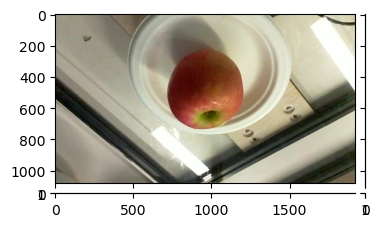

dish_1558114086 : 


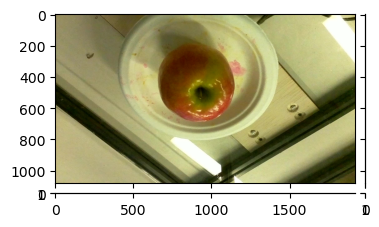

dish_1558027001 : 


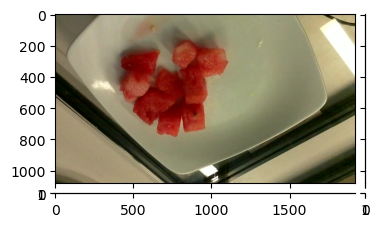

dish_1558373159 : 


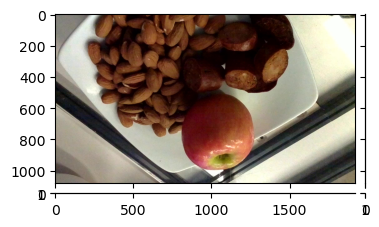

dish_1558115364 : 


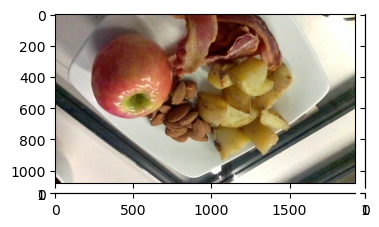

dish_1558114875 : 


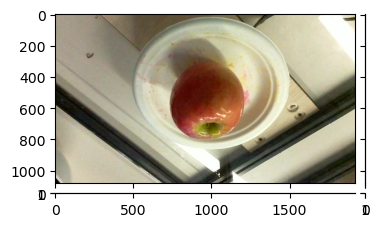

dish_1558375506 : 


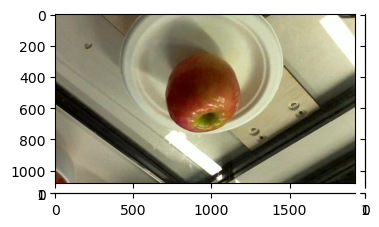

dish_1558028142 : 


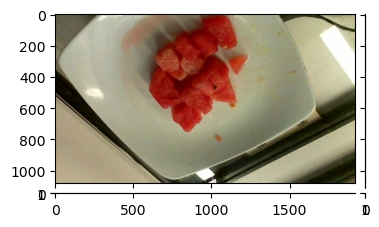

dish_1558031019 : 


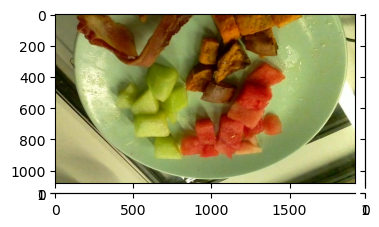

dish_1558030724 : 


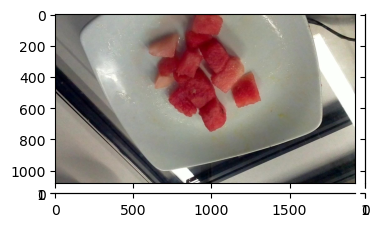

dish_1558109945 : 


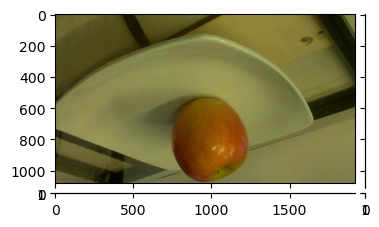

dish_1558027243 : 


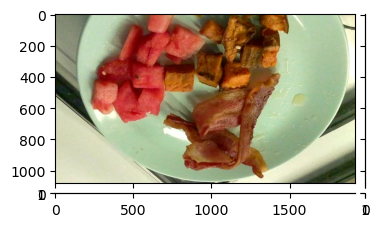

dish_1558373074 : 


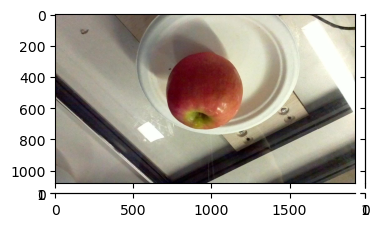

dish_1558379876 : 


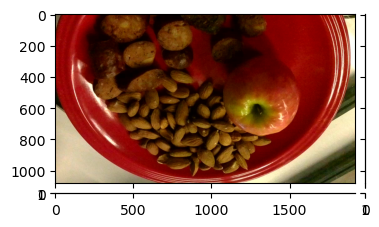

dish_1558115282 : 


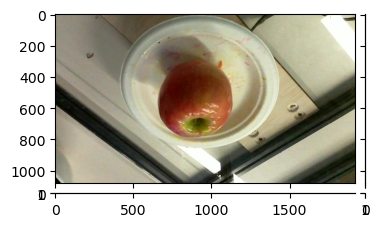

dish_1558379588 : 


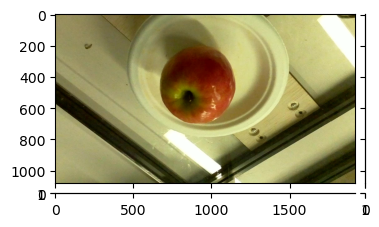

dish_1558376984 : 


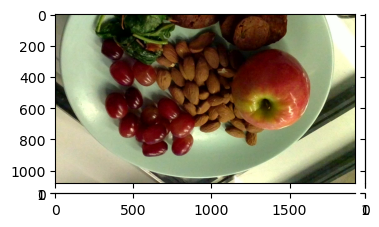

dish_1558028606 : 


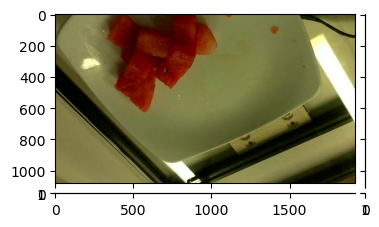

dish_1558122740 : 


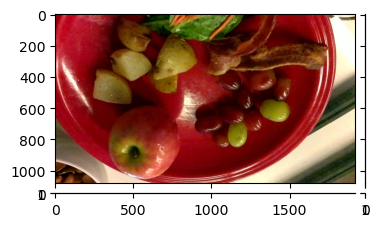

dish_1558116547 : 


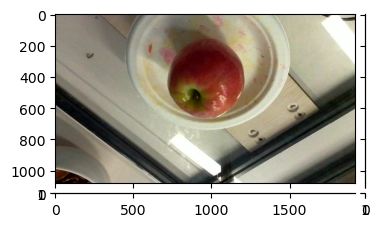

dish_1558115047 : 


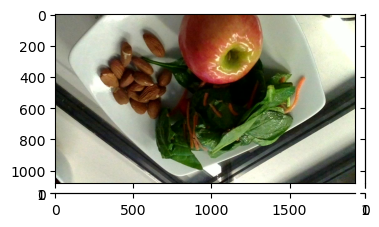

dish_1558380152 : 


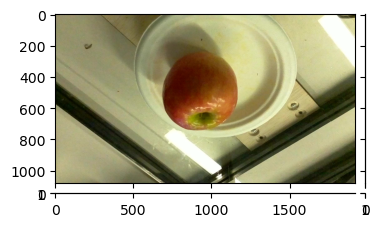

dish_1558375583 : 


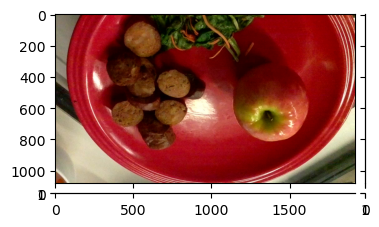

dish_1558031394 : 


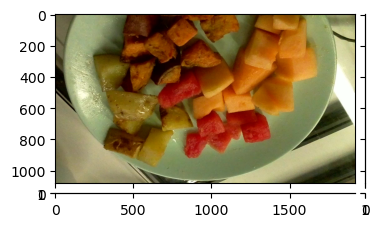

dish_1558114284 : 


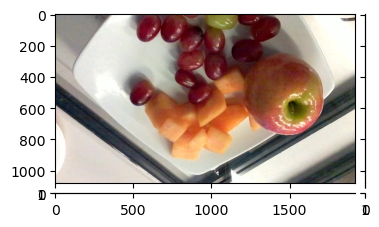

dish_1558028772 : 


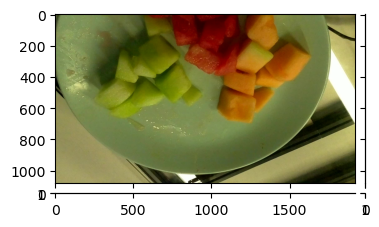

dish_1558031351 : 


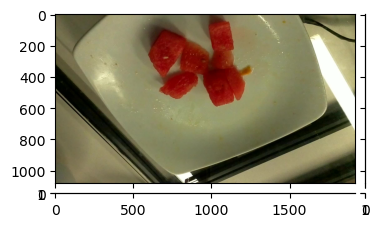

dish_1558376768 : 


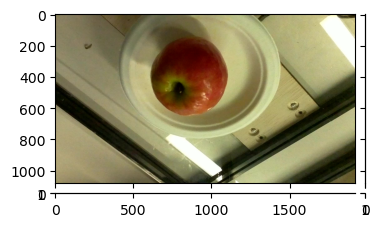

dish_1558372771 : 


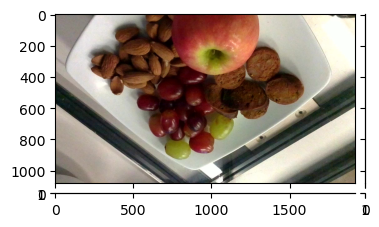

dish_1558380181 : 


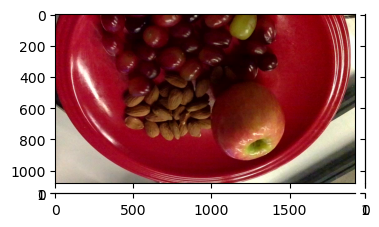

dish_1558028194 : 


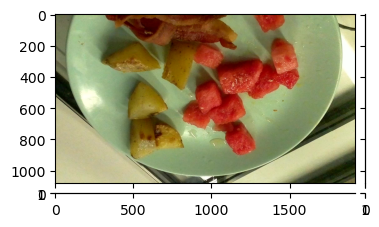

In [38]:
for dish_id in rows_with_invalid_ingredients["dish_id"]:
    target_path = Path(f"../final-dataset/images/generic/{dish_id}")
    fig = plt.figure(figsize=(4.0, 4.0))
    grid = ImageGrid(fig, 111, nrows_ncols=(2, 2), axes_pad=0.1)
    print(f"{dish_id} : ")
    for ax, image in zip(grid, target_path.iterdir()):
        img = Image.open(image).convert("RGB")
        img = np.asarray(img)
        ax.imshow(img)
        plt.show()
        break

In [20]:
# Replace deprecated with either apple or watermelon based on images above
replace_deprecated = {
    "dish_1558372433": "apple",
    "dish_1558114086": "apple",
    "dish_1558027001": "watermelon",
    "dish_1558373159": "apple",
    "dish_1558115364": "apple",
    "dish_1558114875": "apple",
    "dish_1558375506": "apple",
    "dish_1558028142": "watermelon",
    "dish_1558031019": "watermelon",
    "dish_1558030724": "watermelon",
    "dish_1558109945": "apple",
    "dish_1558027243": "watermelon",
    "dish_1558373074": "apple",
    "dish_1558379876": "apple",
    "dish_1558115282": "apple",
    "dish_1558379588": "apple",
    "dish_1558376984": "apple",
    "dish_1558028606": "watermelon",
    "dish_1558122740": "apple",
    "dish_1558116547": "apple",
    "dish_1558115047": "apple",
    "dish_1558380152": "apple",
    "dish_1558375583": "apple",
    "dish_1558031394": "watermelon",
    "dish_1558114284": "apple",
    "dish_1558028772": "watermelon",
    "dish_1558031351": "watermelon",
    "dish_1558376768": "apple",
    "dish_1558372771": "apple",
    "dish_1558380181": "apple",
    "dish_1558028194": "watermelon",
}

for dish_id in replace_deprecated.keys():
    target_row = cleaned_metadata.loc[
        cleaned_metadata["dish_id"] == dish_id, "Ingredients"
    ]
    ingredients = target_row.values[0]
    ingredients = ingredients.replace("deprecated", replace_deprecated[dish_id])
    cleaned_metadata.at[target_row.index[0], "Ingredients"] = ingredients

In [21]:
# Check the update rows
for dish_id in replace_deprecated.keys():
    target_row = cleaned_metadata.loc[cleaned_metadata["dish_id"] == dish_id]
    display(target_row)

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
5  dish_1558372433            0.52            0.003        0.14   0.002   

  Ingredients  
5       apple

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
86  dish_1558114086            0.52            0.003        0.14   0.002   

   Ingredients  
86       apple

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
190  dish_1558027001             0.3            0.076       0.006   0.001   

    Ingredients  
190  watermelon

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)   Fat(g)  \
489  dish_1558373159        3.033943         0.091332    0.181512  0.23688   

               Ingredients  
489  sausage,apple,almonds

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
858  dish_1558115364        1.550351         0.084677     0.12607  0.086291   

                      Ingredients  
858  potatoes,apple,almonds,bacon

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
1021  dish_1558114875            0.52            0.003        0.14   0.002   

     Ingredients  
1021       apple

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
1087  dish_1558375506            0.52            0.003        0.14   0.002   

     Ingredients  
1087       apple

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
1335  dish_1558028142             0.3            0.076       0.006   0.001   

     Ingredients  
1335  watermelon

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
1504  dish_1558031019        1.047929         0.154437    0.037122  0.033269   

                               Ingredients  
1504  yam,bacon,watermelon,honeydew melons

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
1574  dish_1558030724             0.3            0.076       0.006   0.001   

     Ingredients  
1574  watermelon

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
1656  dish_1558109945            0.52            0.003        0.14   0.002   

     Ingredients  
1656       apple

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
1679  dish_1558027243        1.615736         0.151521    0.076982  0.078515   

               Ingredients  
1679  watermelon,bacon,yam

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
1931  dish_1558373074            0.52            0.003        0.14   0.002   

     Ingredients  
1931       apple

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
2077  dish_1558379876         3.07019         0.085952    0.182599  0.240019   

                Ingredients  
2077  apple,sausage,almonds

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
2181  dish_1558115282            0.52            0.003        0.14   0.002   

     Ingredients  
2181       apple

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
2199  dish_1558379588            0.52            0.003        0.14   0.002   

     Ingredients  
2199       apple

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)   Fat(g)  \
2450  dish_1558376984         1.91908         0.086371    0.129829  0.13024   

                                    Ingredients  
2450  almonds,apple,sausage,mixed greens,grapes

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
2618  dish_1558028606             0.3            0.076       0.006   0.001   

     Ingredients  
2618  watermelon

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
2654  dish_1558122740        0.855757         0.074424    0.094141  0.025339   

                                   Ingredients  
2654  grapes,mixed greens,apple,potatoes,bacon

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
2711  dish_1558116547            0.52            0.003        0.14   0.002   

     Ingredients  
2711       apple

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
2741  dish_1558115047        0.960849         0.035689    0.120651  0.048972   

                     Ingredients  
2741  mixed greens,almonds,apple

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
2755  dish_1558380152            0.52            0.003        0.14   0.002   

     Ingredients  
2755       apple

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
3086  dish_1558375583        1.538382         0.020813     0.14939  0.098251   

                     Ingredients  
3086  mixed greens,sausage,apple

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
3282  dish_1558031394        0.746572         0.174453    0.013302  0.001638   

                             Ingredients  
3282  cantaloupe,watermelon,potatoes,yam

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
3398  dish_1558114284        0.513386         0.071421    0.067472   0.002   

                  Ingredients  
3398  apple,grapes,cantaloupe

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
3599  dish_1558028772        0.333333         0.082083    0.006292  0.001318   

                                Ingredients  
3599  watermelon,honeydew melons,cantaloupe

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
3605  dish_1558031351             0.3            0.076       0.006   0.001   

     Ingredients  
3605  watermelon

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)  Fat(g)  \
3644  dish_1558376768            0.52            0.003        0.14   0.002   

     Ingredients  
3644       apple

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
3645  dish_1558372771        1.680418         0.085881    0.123177  0.106048   

                       Ingredients  
3645  apple,grapes,sausage,almonds

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
3774  dish_1558380181        1.197879          0.10454    0.092722  0.058703   

               Ingredients  
3774  almonds,apple,grapes

dish_id  Calories(kcal)  Carbohydrate(g)  Protein(g)    Fat(g)  \
4507  dish_1558028194        1.325872         0.104709    0.071035  0.069209   

                    Ingredients  
4507  bacon,watermelon,potatoes

In [20]:
# Write the cleaned metadata file
destination_file = Path("../final-dataset/metadata/nutrition5k_metadata.csv")
cleaned_metadata.to_csv(destination_file, sep="\t", index=False, float_format="%.4f")

## Preprocess video to images

### Extract frames from side_angles directory

In [22]:
destination_dir = Path("../final-dataset/images/generic")
source_dir = Path("./imagery/side_angles")

In [37]:
if not destination_dir.exists():
    destination_dir.mkdir()
    for directory in source_dir.iterdir():
        output_dir = destination_dir / directory.name
        output_dir.mkdir()
        output_dir = output_dir.resolve().as_posix()
        for video_file in directory.iterdir():
            input_file = video_file.resolve().as_posix()
            os.system(
                'ffmpeg -i "{input_file}" -vf "select=not(mod(n\,5))" -fps_mode vfr "{output_dir}/{camera_name}_frame_%03d.jpeg"'.format(
                    input_file=input_file,
                    output_dir=output_dir,
                    camera_name=video_file.stem,
                )
            )

In [33]:
# Remove fault frames discovered
# Files begin from "D:\School Materials\FoodNet\Food Datasets\final-dataset\images\generic\dish_1575393132" have issues for camera B and C frames
destination_dir = Path("../final-dataset/images/generic")
faulty_dir = [
    "dish_1576171204",
    "dish_1576171237",
    "dish_1576183111",
    "dish_1576258613",
    "dish_1576258657",
    "dish_1576258685",
    "dish_1576259732",
    "dish_1576259776",
    "dish_1575393132",
    "dish_1575404926",
    "dish_1575407477",
    "dish_1575478635",
    "dish_1575478663",
    "dish_1575481406",
    "dish_1575481443",
    "dish_1575653017",
    "dish_1575664962",
    "dish_1575923584",
    "dish_1575923893",
    "dish_1575924356",
    "dish_1575997210",
    "dish_1575997241",
    "dish_1575997268",
    "dish_1575998399",
    "dish_1575999037",
    "dish_1576100046",
    "dish_1576171118",
    "dish_1576171157",
]

for directory in faulty_dir:
    path = destination_dir / directory
    print(path.resolve())
    all_files = [
        file
        for file in path.iterdir()
        if file.name.__contains__("camera_B") or file.name.__contains__("camera_C")
    ]
    for file in all_files:
        file.unlink()
        print(str(file.resolve()) + " has been removed.")
    print("\n")

D:\School Materials\FoodNet\Food Datasets\final-dataset\images\generic\dish_1576171204
D:\School Materials\FoodNet\Food Datasets\final-dataset\images\generic\dish_1576171204\camera_B_frame_001.jpeg has been removed.
D:\School Materials\FoodNet\Food Datasets\final-dataset\images\generic\dish_1576171204\camera_B_frame_002.jpeg has been removed.
D:\School Materials\FoodNet\Food Datasets\final-dataset\images\generic\dish_1576171204\camera_B_frame_003.jpeg has been removed.
D:\School Materials\FoodNet\Food Datasets\final-dataset\images\generic\dish_1576171204\camera_B_frame_004.jpeg has been removed.
D:\School Materials\FoodNet\Food Datasets\final-dataset\images\generic\dish_1576171204\camera_B_frame_005.jpeg has been removed.
D:\School Materials\FoodNet\Food Datasets\final-dataset\images\generic\dish_1576171204\camera_B_frame_006.jpeg has been removed.
D:\School Materials\FoodNet\Food Datasets\final-dataset\images\generic\dish_1576171204\camera_B_frame_007.jpeg has been removed.
D:\School 

### Preprocess single top images from realsense overhead directory

In [38]:
destination_dir = Path("../final-dataset/images/generic")
source_dir = Path("./imagery/realsense_overhead")

In [40]:
for file in source_dir.iterdir():
    output_dir = destination_dir / file.stem
    if output_dir.exists():
        print("This operations have been performed before. Check the folder.")
        break
    output_dir.mkdir()
    destination_path = output_dir / file.name
    shutil.copy(file, destination_path)

This operations have been performed before. Check the folder.


## Writing category and ingredients metadata file

In [21]:
total_categories = ["generic"]
total_ingredients = set()

for index, ingredients in cleaned_metadata.iterrows():
    x = ingredients["Ingredients"].split(",")
    total_ingredients.update(x)

print(f"Total number of ingredients : {len(total_ingredients)}")
pprint(total_ingredients)

Total number of ingredients : 254
{'almond milk',
 'almonds',
 'apple',
 'apple cider',
 'artichokes',
 'arugula',
 'asparagus',
 'avocado',
 'baby carrots',
 'bacon',
 'bagels',
 'balsamic vinegar',
 'banana',
 'banana with peel',
 'barbecue sauce',
 'barley',
 'basil',
 'bean(seed)',
 'beef',
 'beets',
 'bell peppers',
 'berries',
 'biscuits',
 'black beans',
 'blackberries',
 'blue cheese',
 'blueberries',
 'bok choy',
 'bread',
 'bread crumbs',
 'brisket',
 'broccoli',
 'broth',
 'brown rice',
 'brown sugar',
 'brownies',
 'brussels sprouts',
 'bulgur',
 'butter',
 'buttermilk',
 'cabbage',
 'caesar dressing',
 'caesar salad',
 'cantaloupe',
 'carrot',
 'cashews',
 'cauliflower',
 'celery',
 'celery root',
 'cereal',
 'chard',
 'chayote squash',
 'cheddar cheese',
 'cheese',
 'cheese pizza',
 'cherry tomatoes',
 'chia seeds',
 'chicken',
 'chicken apple sausage',
 'chicken breast',
 'chicken salad',
 'chicken thighs',
 'chickpeas',
 'chilaquiles',
 'chili',
 'chive',
 'cilantro',
 

In [22]:
with open("../final-dataset/metadata/nutrition5k_ingredients.txt", "w") as file:
    file.write("\n".join(total_ingredients))

## Writing recipe to food2vec recipe corpus

In [23]:
write_to_file = []
for index, rows in cleaned_metadata.iterrows():
    ingredients_string = " ".join(rows["Ingredients"].split(","))
    write_to_file.append(ingredients_string)

with open(
    "../../Ingredient Embeddings/recipe_corpus/nutrition5k_train.txt", "w"
) as file:
    file.write("\n".join(write_to_file))